# Obligatorio - Taller de Deep Learning

**Fecha de entrega:** 3/12/2025  
**Puntaje máximo:** 50 puntos

**Alumno(s):** Ramiro Sanes, Joaquin Guerra

## Obligatorio

El objetivo de este obligatorio es evaluar su conocimiento en Deep Learning mediante la implementación completa de un modelo de segmentación de imágenes basado en el paper [**"U-Net: Convolutional Networks for Biomedical Image Segmentation"**](https://arxiv.org/pdf/1505.04597). Toda la implementación debe realizarse desde cero utilizando PyTorch, y los estudiantes tendrán la libertad de ajustar ciertos hiperparámetros y configuraciones mientras mantengan la esencia del paper original.

### **Competencia en Kaggle**

Además, como parte de este obligatorio, participarán en una competencia privada en Kaggle donde se les proporcionará un dataset de test oculto (sin target). Deberán subir sus predicciones a Kaggle y se evaluarán en función de la métrica **Dice Coefficient (Coeficiente de Dice)**. Esta competencia les permitirá comparar sus resultados con los de sus compañeros en un entorno real de evaluación.

### **¿Qué es el Dice Coefficient?**
El **Dice Coefficient**, también conocido como F1-score para segmentación, es una métrica utilizada para evaluar la similitud entre la predicción y la verdad del terreno en tareas de segmentación. Se define de la siguiente manera:

$$
\text{Dice} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

Donde:
- $A$ es el conjunto de píxeles predichos como pertenecientes a la clase positiva.
- $B$ es el conjunto de píxeles verdaderos pertenecientes a la clase positiva.
- $|A \cap B|$ es la intersección de $A$ y $B$, es decir, los píxeles correctamente predichos como positivos.

Un valor de Dice de **1** indica una predicción perfecta, mientras que un valor de **0** indica que no hay coincidencia entre la predicción y el valor verdadero. Durante la competencia de Kaggle, deberán obtener un puntaje de al menos **0.75** en la métrica Dice para considerarse aprobados.

### **Criterios a Evaluar**

1. **Análisis del Dataset (5 puntos):**
   - Exploración y visualización del dataset para comprender su estructura y características.
   - Justificación de las decisiones tomadas en la preprocesamiento de datos, como normalización, aumento de datos (data augmentation), y partición del dataset en conjuntos de entrenamiento, validación y prueba.

2. **Implementación Correcta del Modelo U-Net (20 puntos):**
   - Construcción de la arquitectura U-Net siguiendo la estructura descrita en el paper, permitiendo ajustes como el número de filtros, funciones de activación y métodos de inicialización de pesos.
   - Se aceptan mejoras como el uso de técnicas adicionales como batch normalization, otras funciones de activación, etc.

3. **Entrenamiento del Modelo (10 puntos):**
   - Configuración adecuada del ciclo de entrenamiento, incluyendo la elección de la función de pérdida y del optimizador (Adam, SGD, etc.).
   - Uso de técnicas de regularización para mejorar la generalización del modelo, como el dropout, normalización de batch y data augmentation.
   - Gráficas y análisis de la evolución del entrenamiento, mostrando las curvas de pérdida y métricas relevantes tanto en el conjunto de entrenamiento como en el de validación.
   - Puede utilizarse experimentación con hiperparámetros con Weights & Biases (W&B) para optimizar el rendimiento del modelo. Este punto no es obligatorio, pero se valorará positivamente si se justifica su uso y se presentan resultados claros.

4. **Evaluación de Resultados (10 puntos):**
   - Evaluación exhaustiva del modelo utilizando métricas de segmentación como **Dice Coefficient**.
   - Análisis detallado de los resultados, incluyendo un análisis de errores para identificar y discutir casos difíciles.
   - Visualización de ejemplos representativos de segmentaciones correctas e incorrectas, comparando con las etiquetas manuales proporcionadas en el dataset.

5. **Participación y Resultados en la Competencia Kaggle (5 puntos):**
   - Participación activa en la competencia de Kaggle, con al menos una (1) subida de predicción.
   - Puntaje obtenido en la tabla de posiciones de Kaggle, evaluado en base al **Dice Coefficient** en el conjunto de test oculto. Es necesario obtener al menos un valor de **0.75** para esta métrica.

   Notas:
   - **Cualquier decisión debe ser justificada en el notebook.**
   - El **Dice Coefficient** es la métrica utilizada para evaluar la precisión de los modelos de segmentación de imágenes en esta competencia.

### **Run-Length Encoding (RLE)**

Dado que no se suben las imágenes segmentadas directamente a Kaggle, se requiere usar **Run-Length Encoding (RLE)** para comprimir las máscaras de predicción en una cadena de texto que será evaluada. El **RLE** es una técnica de compresión donde se representan secuencias consecutivas de píxeles en formato `start length`, indicando la posición de inicio y la longitud de cada secuencia de píxeles positivos.

Para calcular el **RLE**, se sigue el siguiente proceso:

1. Se aplanan las máscaras predichas en un solo vector
2. Se identifican los píxeles con valor positivo (1) y se calculan las secuencias consecutivas.
3. Se registra la posición de inicio de cada secuencia y su longitud en formato `start length`.

Este formato comprimido se sube a Kaggle en lugar de las imágenes segmentadas.

#### **Ejemplo de RLE**

```python
import numpy as np

def rle_encode(mask):
    pixels = np.array(mask).flatten(order='F')  # Aplanar la máscara en orden Fortran
    pixels = np.concatenate([[0], pixels, [0]])  # Añadir ceros al principio y final
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Encontrar transiciones
    runs[1::2] = runs[1::2] - runs[::2]  # Calcular longitudes
    return ' '.join(str(x) for x in runs)

mask = np.array([[0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 0],
                 [1, 1, 1, 0, 0],
                 [0, 0, 0, 1, 1]])

print(rle_encode(mask))
```

> **Salida:** 3 1 6 2 9 3 14 1 16 1 20 1


### **Sobre el Dataset**

El dataset proporcionado para esta tarea incluirá imágenes y máscaras para la segmentación de un conjunto específico de clases. El conjunto de entrenamiento estará disponible para su uso durante todo el proceso de desarrollo y pruebas, mientras que el conjunto de validación se mantendrá oculto para la evaluación final en Kaggle.

### **Instrucciones de Entrega**

- Deberán entregar un Jupyter Notebook (.ipynb) que contenga todo el código y las explicaciones necesarias para ejecutar la implementación, el entrenamiento y la evaluación del modelo.
- El notebook debe incluir secciones bien documentadas explicando las decisiones de diseño del modelo, los experimentos realizados, y los resultados obtenidos.
- El código debe estar escrito de manera clara.
- La entrega debe realizarse a través de la plataforma de gestión de ORT (gestion.ort.edu.uy) antes de la fecha límite.

### **Materiales Adicionales**

Para facilitar su trabajo, pueden consultar los siguientes recursos:

- [U-Net: Convolutional Networks for Biomedical Image Segmentation (paper original)](https://arxiv.org/abs/1505.04597)
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Tutoriales y recursos adicionales en Kaggle](https://www.kaggle.com/)
- [Convolución Transpuesta](https://d2l.ai/chapter_computer-vision/transposed-conv.html)

### **Competencia Kaggle**

[Link a la competencia Kaggle](https://www.kaggle.com/competitions/tdl-obligatorio-2025)

In [1]:
# Imports necesarios
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from torchvision.transforms import v2 as T
from typing import Literal
import wandb

import os
import gc

from torch.utils.data import random_split, Subset

from utils import train, plot_taining

# Configuración para reproducibilidad
torch.manual_seed(42)
np.random.seed(42)


In [2]:
#!mkdir -p ~/.kaggle

In [3]:
#!cp kaggle.json ~/.kaggle/

In [4]:
#!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#!pip install kaggle

In [6]:
#!kaggle competitions download -c tdl-obligatorio-2025

In [7]:
#!unzip tdl-obligatorio-2025.zip

In [8]:
#drive.mount('/content/drive')

#CHECKPOINT_DIR = "/content/drive/MyDrive/unet_checkpoints"
#os.makedirs(CHECKPOINT_DIR, exist_ok=True)
#print("Carpeta de checkpoints:", CHECKPOINT_DIR)

---

## 1. Preprocesamiento y Dataset

### Decisiones de preprocesamiento en imagenes:

1. **Resize a 572x572**:
   - Tamaño original del paper U-Net
   - Reduce el costo computacional respecto a las imágenes originales (800x800), lo que permite entrenar más rápido y con batch sizes razonables.

2. **Normalización [0, 1]**:
   - Estabiliza el entrenamiento
   - Mejora convergencia del optimizador

3. **Data Augmentation** (solo en entrenamiento):
   - Random horizontal flip (50% probabilidad)
   - Random vertical flip (50% probabilidad)
   - Random rotation (±15 grados)
   - Ayuda a generalizar mejor con dataset limitado

### Decisiones de preprocesamiento en máscaras:

1. **Resize a 572x572**:
   - Al igual que hicimos en las imágenes

2. **Data Augmentation**:
   - Se aplican las mismas transformaciones que en las imágenes.
   - Necesitamos sincronizar las transformaciones con las de las imágenes

3. **Escala de grises**:
   - Necesitamos 1 solo canal que represente fondo u objeto, esto lo hacemos en `__getitem__` del dataset  (`mask = Image.open(mask_path).convert("L")`)

4. **Tipo de dato: float32**:
   - con `scale = False` se mantienen los valores sin normalizar
   - En el `__getitem__` del dataset lo convertimos a binario con `mask > 0`
  


In [9]:
# Transforms base (sin augmentation) para validación
base_img_transform = T.Compose([
    T.ToImage(),
    T.Resize((572, 572)),
    T.ToDtype(torch.float32, scale=True)
])

base_mask_transform = T.Compose([
    T.ToImage(),
    T.Resize((572, 572)),
    T.Grayscale(num_output_channels=1),
    T.ToDtype(torch.float32, scale=False),
])

# Transforms con augmentation para entrenamiento

# Hacemos un transform conjunto para imagenes y mascaras para sincronizar la data augmentation
joint_transform = T.Compose([
    T.ToImage(),
    T.Resize((572, 572)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.RandomRotation(degrees=15),
])

# Transform para aplicar a las imagenes luego del joint transform
train_img_transform = T.Compose([
    T.ToDtype(torch.float32, scale=True),
])

# Transform para aplicar a las mascaras luego del joint transform
train_mask_transform = T.Compose([
    T.ToDtype(torch.float32, scale=False),
])


In [10]:
class SegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, joint_transform=None, img_transform=None, mask_transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.joint_transform = joint_transform
        self.img_transform = img_transform
        self.mask_transform = mask_transform

        self.images = sorted(os.listdir(images_dir))
        self.masks = sorted(os.listdir(masks_dir))

        assert len(self.images) == len(self.masks), "Cantidad distinta de imágenes y máscaras"

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])

        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # 1 canal

        if self.joint_transform is not None:
            img, mask = self.joint_transform(img, mask)

        if self.img_transform is not None:
            img = self.img_transform(img)

        if self.mask_transform is not None:
            mask = self.mask_transform(mask)

        # Binarizamos la máscara: cualquier valor > 0 es clase positiva
        mask = (mask > 0).float()

        return img, mask


In [11]:
BATCH_SIZE = 8

In [12]:
train_dataset_aug = SegmentationDataset(
    "train/images",
    "train/masks",
    joint_transform=joint_transform,
    img_transform=train_img_transform,
    mask_transform=train_mask_transform
)

val_dataset_base = SegmentationDataset(
    "train/images",
    "train/masks",
    joint_transform=joint_transform,
    img_transform=base_img_transform,
    mask_transform=base_mask_transform
)

n = len(train_dataset_aug)
val_size = int(0.2 * n)
train_size = n - val_size

# Hacemos el split sobre índices para que train y val vean las mismas imágenes,
# pero con transforms distintos
indices = list(range(n))
train_idx, val_idx = random_split(
    indices,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

train_ds = Subset(train_dataset_aug, train_idx.indices)
val_ds   = Subset(val_dataset_base, val_idx.indices)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"Datos para entrenamiento: {len(train_ds)}")
print(f"Datos para validación: {len(val_ds)}")
print(f"Baches de entrenamiento: {len(train_loader)}")
print(f"Baches de validación: {len(val_loader)}")

Datos para entrenamiento: 1707
Datos para validación: 426
Baches de entrenamiento: 214
Baches de validación: 54


---

## 2. Arquitectura U-Net

### Implementamos siguiendo el paper original

1. **Encoder**:
   - DoubleConv: 2 capas conv 3x3 + ReLU, a diferencia del paper original usamos padding = 1 para simplificar, no hacer cropping y mantener la resolución constante.
   - MaxPool 2x2 stride 2 para downsampling
   - En cada nivel se duplican los canales

2. **Decoder (Expansive Path)**:
   - ConvTranspose2d o Upsample bilinear. Luego de algunas pruebas decidimos utilizar Upsample bilinear para nuestros modelos.
   - Concatenación con skip connections del encoder
   - DoubleConv

3. **Cambios implementados**:
   - **Batch Normalization**: para estabilizar el entrenamiento
   - **Padding en convs**: permite mantener el tamaño espacial a lo largo de la red y simplificar las skip connections.
   - **Inicialización Kaiming**: apropiada para ReLU, la utilizamos para evitar problemas de exploding/vanishing gradients

In [13]:
class DoubleConv(nn.Module):
    def __init__(self, in_ch: int, out_ch: int, use_bn: bool = True):
        super().__init__()
        layers = []

        # Primera convolución
        layers.append(nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1, bias=not use_bn))
        if use_bn:
            layers.append(nn.BatchNorm2d(out_ch))
        layers.append(nn.ReLU(inplace=True))

        # Segunda convolución
        layers.append(nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1, bias=not use_bn))
        if use_bn:
            layers.append(nn.BatchNorm2d(out_ch))
        layers.append(nn.ReLU(inplace=True))

        self.block = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.block(x)

In [14]:
class Down(nn.Module):
    def __init__(self, in_ch: int, out_ch: int, use_bn: bool = True):
        super().__init__()
        self.pool = nn.MaxPool2d(2)
        self.conv = DoubleConv(in_ch, out_ch, use_bn=use_bn)

    def forward(self, x):
        x = self.pool(x)
        x = self.conv(x)
        return x


In [15]:
class Up(nn.Module):

    def __init__(self, in_ch: int, out_ch: int, bilinear: bool = True, use_bn: bool = True):
        super().__init__()

        if bilinear:
            # Upsampling bilinear + conv 1x1 para reducir canales
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.reduce = nn.Conv2d(in_ch, in_ch // 2, kernel_size=1)
        else:
            # ConvTranspose2d (up-conv aprendida)
            self.up = nn.ConvTranspose2d(in_ch, in_ch // 2, kernel_size=2, stride=2)
            self.reduce = nn.Identity()

        # DoubleConv despues de concatenar
        # in_ch // 2 (de up) + out_ch (por la skip connection)
        self.conv = DoubleConv(in_ch // 2 + out_ch, out_ch, use_bn=use_bn)

    @staticmethod
    def _pad_to_match(x: torch.Tensor, ref: torch.Tensor) -> torch.Tensor:
        """Ajusta x para que coincida con el tamaño de ref"""
        diff_y = ref.size(2) - x.size(2)
        diff_x = ref.size(3) - x.size(3)
        # Si ya coinciden, no hacemos cambios y retornamos x
        if diff_x == 0 and diff_y == 0:
            return x
        # si hay diferencias agregamos padding para que queden alineadas
        return F.pad(x, [diff_x // 2, diff_x - diff_x // 2,
                        diff_y // 2, diff_y - diff_y // 2])

    def forward(self, x: torch.Tensor, skip: torch.Tensor) -> torch.Tensor:
        x = self.up(x)
        x = self.reduce(x)
        x = self._pad_to_match(x, skip)
        # Concatenamos
        x = torch.cat([skip, x], dim=1)
        x = self.conv(x)
        return x

In [16]:
class OutConv(nn.Module):
    def __init__(self, in_ch: int, out_ch: int):
        super().__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [17]:
class UNet(nn.Module):
    """
    Arquitectura U-Net completa

    Argumentos:
        in_channels: Número de canales de entrada (1 para grayscale, 3 para RGB)
        num_classes: Número de canales de salida (1 para segmentación binaria)
        base_ch: Número de filtros en el primer nivel (64 en paper original)
        depth: Número de niveles de pooling (4 en paper original)
        bilinear: Si True usa upsampling bilinear, si False usa ConvTranspose2d
        use_bn: Si True usa Batch Normalization
    """
    def __init__(self, in_channels=3, num_classes=1, base_ch=64, depth=4,
                 bilinear=False, use_bn=True):
        super().__init__()

        # Creamos una lista con los canales para cada nivel dependiendo del base_ch: [64, 128, 256, 512, 1024] en el paper original
        chs = [base_ch * (2 ** i) for i in range(depth + 1)]

        #  ENCODER
        # Primer bloque
        self.inc = DoubleConv(in_channels, chs[0], use_bn=use_bn)

        # Bloques con maxpool
        self.downs = nn.ModuleList()
        for i in range(depth):
            self.downs.append(Down(chs[i], chs[i + 1], use_bn=use_bn))

        # DECODER
        self.ups = nn.ModuleList()
        for i in reversed(range(depth)):
            self.ups.append(Up(chs[i + 1], chs[i], bilinear=bilinear, use_bn=use_bn))

        # Convolución de salida
        self.outc = OutConv(chs[0], num_classes)

        # Inicializamos los pesos
        self._init_weights()

    # Inicialización Kaiming
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d)):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        #ENCODER
        skips = []

        x = self.inc(x)

        skips.append(x)

        for down in self.downs:
            x = down(x)
            skips.append(x)

        # DECODER
        x = skips.pop()

        # Ascenso concatenando lo guardado en skip
        for up in self.ups:
            skip = skips.pop()
            x = up(x, skip)

        return self.outc(x)

## Dice Loss

Del análisis del dataset sabemos que hay cierto **desbalance de clases**. La mayoría de los píxeles son negativos (fondos).

**Ventajas**
- Optimiza directamente el Dice Coefficient que es la métrica con la cual se va a evaluar el modelo en Kaggle.
- Maneja bien el desbalance
- BCE da igual peso a todos los píxeles

Probaremos con Dice Loss, BCE y una combinacion de ambas



In [18]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, logits, targets):
        """
        Args:
            logits: salida del modelo (B, 1, H, W), sin sigmoid
            targets: máscara ground truth (B, 1, H, W), valores 0/1

        Returns:
            loss: 1 - Dice coefficient (escalar)
        """
        # Aplicamos sigmoid para obtener probabilidades
        probs = torch.sigmoid(logits)

        # Aplanamos para facilitar el calculo
        probs_flat = probs.view(-1)
        targets_flat = targets.view(-1)

        # Calculamos interseccion y union
        intersection = (probs_flat * targets_flat).sum()
        union = probs_flat.sum() + targets_flat.sum()

        # Calculamos el coeficiente
        dice = (2. * intersection + self.smooth) / (union + self.smooth)

        # La perdida es 1- coeficiente y es lo que queremos minimizar
        return 1 - dice


## Combined Loss

Implementamos Combined Loss para poder utlizar una función de perdida compuesta entre la Dice Loss y BCE. utilizando los argumentos dice_weight y bce_weight como ponderadores.



In [19]:
class CombinedLoss(nn.Module):

    def __init__(self, dice_weight=0.5, bce_weight=0.5, smooth=1e-6):
        super(CombinedLoss, self).__init__()

        total_weight = dice_weight + bce_weight
        if total_weight == 0:
            self.dice_weight = 0.7
            self.bce_weight = 0.3
        else:
            #si la suma de los pesos no es 1, normalizamos
            total_weight = dice_weight + bce_weight
            self.dice_weight = dice_weight / total_weight
            self.bce_weight = bce_weight / total_weight


        self.dice_loss = DiceLoss(smooth=smooth)
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, logits, targets):
        dice = self.dice_loss(logits, targets)
        bce = self.bce_loss(logits, targets)
        return self.dice_weight * dice + self.bce_weight * bce

---

## Configuración del Entrenamiento

Elegimos algunos hiperparámetros y entrenamos el primer modelo.

### Hiperparámetros elegidos:

- **Optimizador**: Adam (lr=1e-3)
  
- **Función de pérdida**: Dice Loss
  
- **Batch size**: 8

- **Epochs**:
  - 100 con early stopping (patience=10)
  - Detiene si no hay mejora en val_loss por 10 epochs

- **Arquitectura**:
  - base_ch=64 (como paper original)
  - depth=4
  - Batch Normalization activada
  - bilinear = True

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
device

device(type='cuda')

In [27]:
# Configurar device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Usando device: {device}")

# Instanciar modelo
model = UNet(
    in_channels=3,
    num_classes=1,      # Segmentación binaria
    base_ch=64,         # Paper original
    depth=4,            # 4 niveles de pooling
    bilinear=True,     # Usar ConvTranspose2d
    use_bn=True         # Batch Normalization
).to(device)


criterion = DiceLoss(smooth=1e-6)
criterion = CombinedLoss(dice_weight=0.5, bce_weight=0.5, smooth=1e-6)

optimizer = optim.Adam(model.parameters(), lr=1e-3)


✅ Usando device: cuda


---

## 5. Entrenamiento

In [ ]:
train_losses, val_losses, val_dice_scores = train(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    epochs=100,
    patience=10,
    do_early_stopping=True,
    log_every=1,
    checkpoint_dir=CHECKPOINT_DIR,
    save_every=10
)

print(f"Mejor Dice Score: {max(val_dice_scores):.4f}")
print(f"Epoch con mejor resultado: {val_dice_scores.index(max(val_dice_scores)) + 1}")

## El entrenamiento se cortó en la epoca 60 porque se agotó el crédito en Colab

Cargamos el modelo entrenado hasta la epoca 60 

In [ ]:

checkpoint_path = "modelos/checkpoint_epoch_60_notebook_final.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))

Cargamos a mano las listas con las perdidas y el dice score que obtuvimos en el entrenamiento

In [ ]:
train_losses = [
    0.52422, 0.48676, 0.46551, 0.45030, 0.44477,
    0.42960, 0.42181, 0.40051, 0.38620, 0.37635,
    0.36939, 0.36062, 0.35125, 0.33345, 0.33437,
    0.32701, 0.31853, 0.30837, 0.30667, 0.30166,
    0.28979, 0.28527, 0.27732, 0.26610, 0.25936,
    0.25008, 0.24776, 0.24349, 0.24055, 0.23143,
    0.22845, 0.22145, 0.21639, 0.21299, 0.21006,
    0.21067, 0.20554, 0.20451, 0.19579, 0.19630,
    0.19065, 0.18999, 0.18977, 0.18515, 0.18029,
    0.18071, 0.17811, 0.17901, 0.17468, 0.17189,
    0.16626, 0.16847, 0.16200, 0.16309, 0.16018,
    0.15868, 0.15780, 0.15614, 0.15620, 0.15361
]

val_losses = [
    0.51321, 0.46019, 0.45999, 0.45913, 0.44934,
    0.41288, 0.42006, 0.44178, 0.36591, 0.36350,
    0.34924, 0.35118, 0.34590, 0.33184, 0.33884,
    0.31666, 0.30680, 0.32352, 0.31335, 0.29022,
    0.31472, 0.26936, 0.26723, 0.26319, 0.26314,
    0.27314, 0.26554, 0.27009, 0.23739, 0.23799,
    0.23686, 0.26140, 0.23206, 0.22844, 0.27084,
    0.23159, 0.23706, 0.22358, 0.22184, 0.20347,
    0.20216, 0.20956, 0.19043, 0.21431, 0.20943,
    0.20381, 0.18684, 0.18503, 0.20572, 0.19365,
    0.22550, 0.20921, 0.19500, 0.19787, 0.21081,
    0.18320, 0.17937, 0.18117, 0.19333, 0.19048
]


val_dice_scores = [
    0.66029, 0.67426, 0.67975, 0.69465, 0.68231,
    0.69745, 0.67950, 0.65042, 0.73870, 0.74875,
    0.74761, 0.75042, 0.76624, 0.76074, 0.75409,
    0.77182, 0.78074, 0.76502, 0.77760, 0.80366,
    0.78234, 0.81505, 0.81124, 0.82106, 0.82150,
    0.81988, 0.82083, 0.81758, 0.83810, 0.83565,
    0.82920, 0.79858, 0.83664, 0.84254, 0.81779,
    0.82444, 0.84612, 0.84548, 0.84506, 0.85617,
    0.85608, 0.85680, 0.86650, 0.85013, 0.85349,
    0.85982, 0.86823, 0.87251, 0.85441, 0.86317,
    0.83722, 0.86121, 0.86163, 0.86562, 0.86092,
    0.87035, 0.86920, 0.86921, 0.86732, 0.86908
]

## Gráficos en entrenamiento

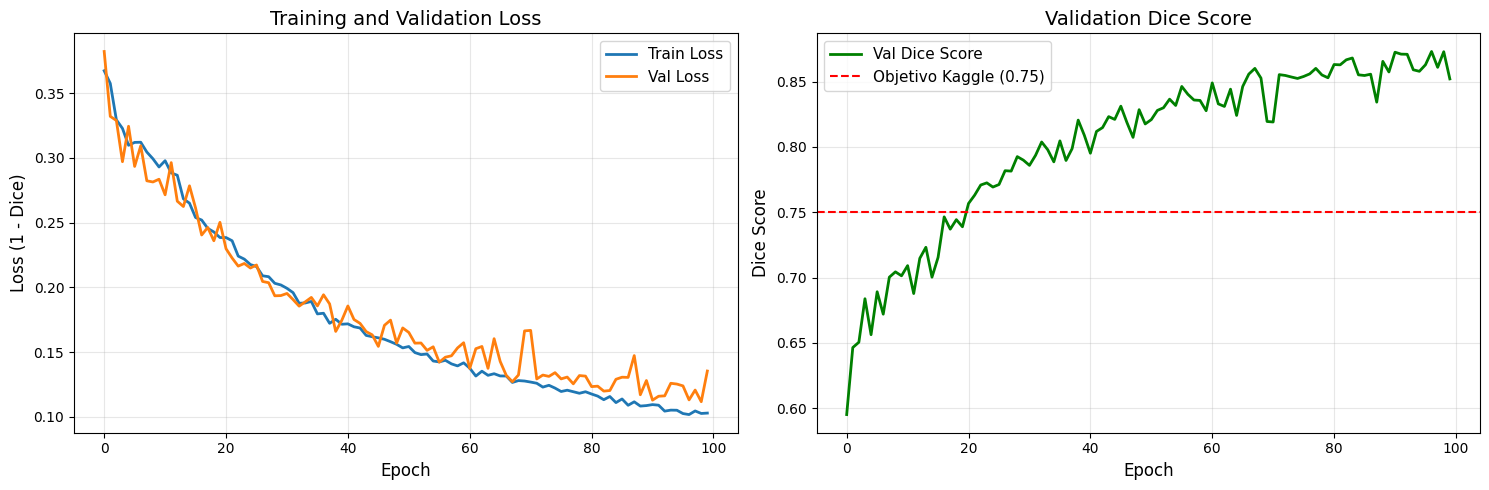


📊 Análisis de curvas:
   - Loss final (train): 0.1030
   - Loss final (val): 0.1354
   - Dice final (val): 0.8521

🎉 ¡Objetivo Kaggle alcanzado! Dice Score ≥ 0.75


In [ ]:
# Visualizamos curvas de entrenamiento
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(train_losses, label='Train Loss', linewidth=2)
axes[0].plot(val_losses, label='Val Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (1 - Dice)', fontsize=12)
axes[0].set_title('Training and Validation Loss', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Dice Score
axes[1].plot(val_dice_scores, label='Val Dice Score', color='green', linewidth=2)
axes[1].axhline(y=0.75, color='red', linestyle='--', label='Objetivo Kaggle (0.75)')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Dice Score', fontsize=12)
axes[1].set_title('Validation Dice Score', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"   - Loss final (train): {train_losses[-1]:.4f}")
print(f"   - Loss final (val): {val_losses[-1]:.4f}")
print(f"   - Dice final (val): {val_dice_scores[-1]:.4f}")

In [ ]:
# Guardar el modelo entrenado
torch.save(model.state_dict(), 'unet_checkpoint_final.pth')

✅ Modelo guardado en 'unet_model_rami.pth'


In [ ]:
# Guardamos el modelo en drive
#torch.save(model.state_dict(), '/content/drive/MyDrive/taller_dl_obligatorio/unet_model.pth')

---

## 6. Evaluación y Visualización

Evaluamos el modelo en el conjunto de validación y visualizamos predicciones para análisis cualitativo.

In [ ]:
# Función para visualizar predicciones
def visualize_predictions(model, dataloader, device, num_samples=5):
    """
    Visualiza predicciones del modelo vs ground truth
    """
    model.eval()

    # Obtener muestras
    all_imgs, all_masks = [], []
    for imgs, masks in dataloader:
        all_imgs.append(imgs)
        all_masks.append(masks)
        if len(all_imgs) * imgs.size(0) >= num_samples:
            break

    imgs = torch.cat(all_imgs, dim=0)[:num_samples]
    masks = torch.cat(all_masks, dim=0)[:num_samples]

    # Predecir
    with torch.no_grad():
        imgs_gpu = imgs.to(device)
        outputs = model(imgs_gpu)
        probs = torch.sigmoid(outputs).cpu()
        preds = (probs > 0.5).float()

    # Visualizar
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4*num_samples))

    for i in range(num_samples):
        # Imagen original
        axes[i, 0].imshow(imgs[i, 0], cmap='gray')
        axes[i, 0].set_title('Imagen Original')
        axes[i, 0].axis('off')

        # Ground truth
        axes[i, 1].imshow(masks[i, 0], cmap='gray')
        axes[i, 1].set_title('Ground Truth')
        axes[i, 1].axis('off')

        # Probabilidades
        axes[i, 2].imshow(probs[i, 0], cmap='hot', vmin=0, vmax=1)
        axes[i, 2].set_title('Probabilidades')
        axes[i, 2].axis('off')

        # Predicción binaria
        axes[i, 3].imshow(preds[i, 0], cmap='gray')
        axes[i, 3].set_title(f'Predicción (threshold=0.5)')
        axes[i, 3].axis('off')

        # Calcular Dice para esta imagen
        intersection = (preds[i, 0] * masks[i, 0]).sum()
        union = preds[i, 0].sum() + masks[i, 0].sum()
        dice = (2. * intersection / (union + 1e-6)).item()

        fig.text(0.5, 1 - (i + 0.5) / num_samples,
                f'Dice Score: {dice:.4f}',
                ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()


✅ Función visualize_predictions definida


In [ ]:
def visualize_predictions(model, dataloader, device, num_samples=5, mode="worst"):
    """
    Visualiza predicciones del modelo según el modo elegido:

    - mode="worst":   muestra las num_gsamples peores predicciones según Dice
    - mode="best":    muestra las num_samples mejores predicciones según Dice
    - mode="any":     muestra num_samples aleatorias de la validación
    """
    assert mode in ["worst", "best", "any"], "mode debe ser 'worst', 'best' o 'any'"

    model.eval()

    all_imgs = []
    all_masks = []
    all_probs = []
    all_preds = []
    all_dices = []

    # Obtenemos todas las predicciones
    with torch.no_grad():
        for imgs, masks in dataloader:
            imgs_gpu = imgs.to(device)

            outputs = model(imgs_gpu)
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            imgs_cpu  = imgs_gpu.cpu()
            masks_cpu = masks.cpu()
            probs_cpu = probs.cpu()
            preds_cpu = preds.cpu()

            for i in range(imgs_cpu.size(0)):
                img = imgs_cpu[i]
                mask = masks_cpu[i, 0]
                prob = probs_cpu[i, 0]
                pred = preds_cpu[i, 0]

                # Dice individual
                inter = (pred * mask).sum()
                union = pred.sum() + mask.sum()
                dice = (2 * inter / (union + 1e-6)).item()

                all_imgs.append(img)
                all_masks.append(mask)
                all_probs.append(prob)
                all_preds.append(pred)
                all_dices.append(dice)

    total = len(all_imgs)

    # seleccionamos las imagenes segun mode
    if mode == "worst":
        sorted_idx = sorted(range(total), key=lambda i: all_dices[i])  # ascendente
        chosen_idx = sorted_idx[:num_samples]

    elif mode == "best":
        sorted_idx = sorted(range(total), key=lambda i: all_dices[i], reverse=True)  # descendente
        chosen_idx = sorted_idx[:num_samples]

    elif mode == "any":
        chosen_idx = random.sample(range(total), num_samples)

    # Visualizamos
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4 * num_samples))

    if num_samples == 1:
        axes = axes.reshape(1, 4)  # por si num_samples == 1

    for row, idx in enumerate(chosen_idx):
        img  = all_imgs[idx]
        mask = all_masks[idx]
        prob = all_probs[idx]
        pred = all_preds[idx]
        dice = all_dices[idx]

        # Imagen original (asumo RGB aquí; si es gray cambiar)
        if img.size(0) == 3:
            axes[row, 0].imshow(img.permute(1, 2, 0))
        else:
            axes[row, 0].imshow(img[0], cmap="gray")

        axes[row, 0].set_title("Imagen")
        axes[row, 0].axis("off")

        axes[row, 1].imshow(mask, cmap="gray")
        axes[row, 1].set_title("Máscara Real")
        axes[row, 1].axis("off")

        axes[row, 2].imshow(prob, cmap="hot", vmin=0, vmax=1)
        axes[row, 2].set_title("Probabilidades")
        axes[row, 2].axis("off")

        axes[row, 3].imshow(pred, cmap="gray")
        axes[row, 3].set_title(f"Predicción (Dice={dice:.4f})")
        axes[row, 3].axis("off")

    plt.tight_layout()
    plt.show()

## Visualizamos las 5 peores predicciones en validación

📊 Visualizando predicciones en conjunto de validación:



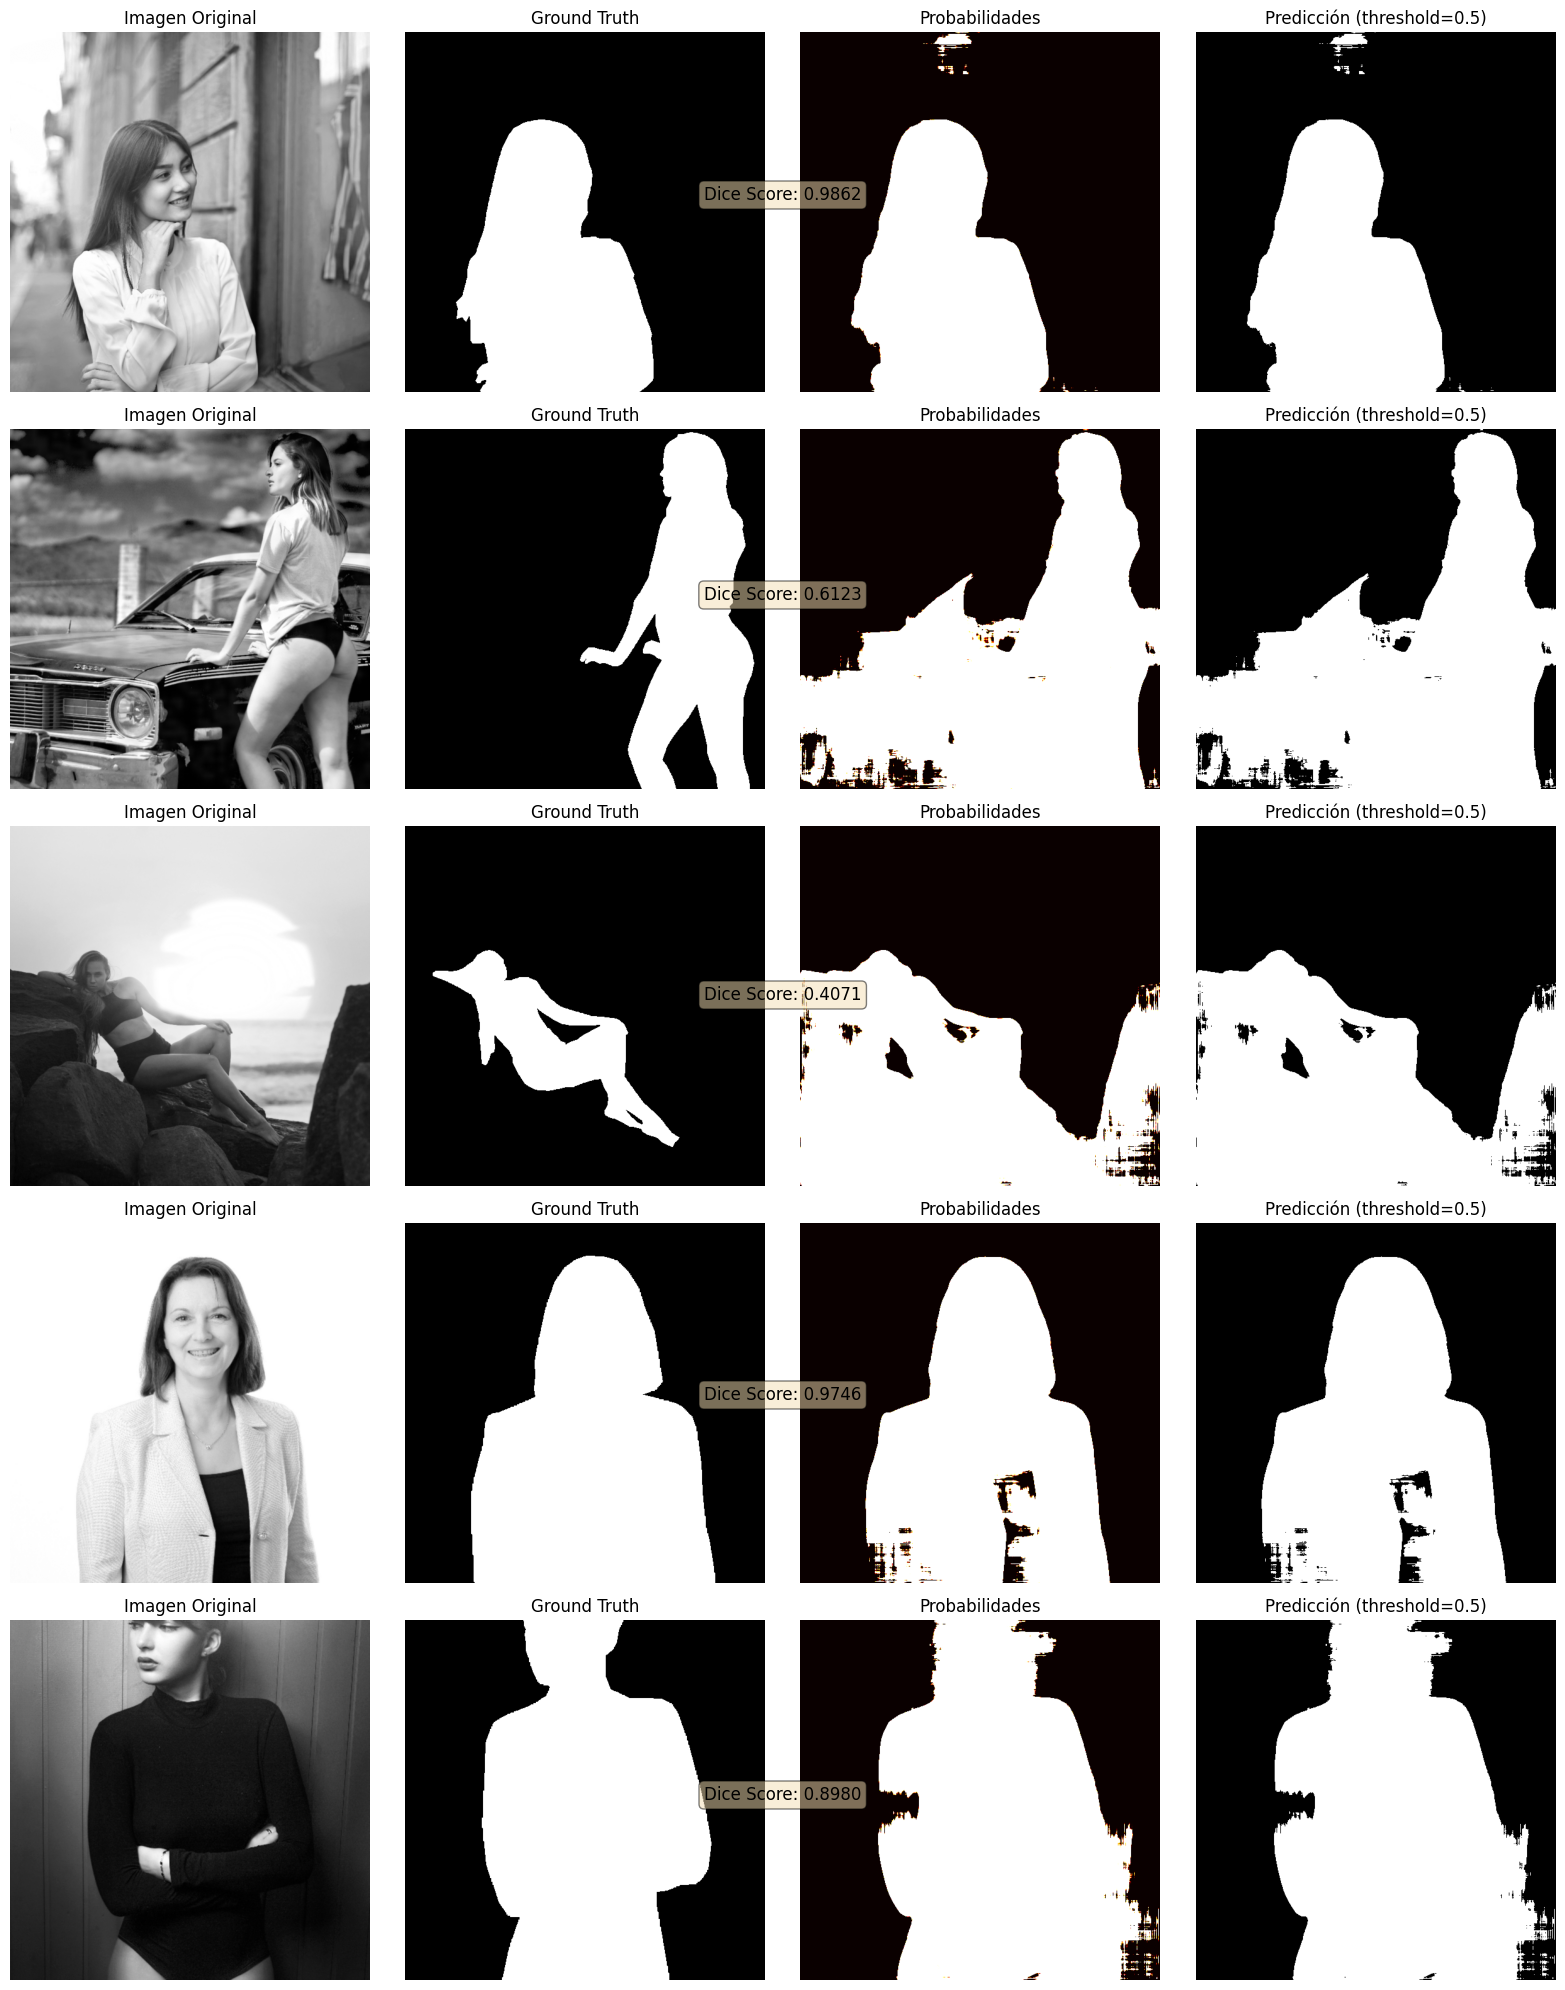

In [ ]:
visualize_predictions(model, val_loader, device, num_samples=5, mode="worst")

## Visualizamos las 5 mejores predicciones en validación

In [ ]:
visualize_predictions(model, val_loader, device, num_samples=5, mode="best")

## Creamos experimentos en WandB

In [21]:
WANDB_TEAM_NAME = "joacoguerrae-ort"
WANDB_PROJECT = "[obligatorio-taller-ia]"
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: joacoguerrae (joacoguerrae-ort). Use `wandb login --relogin` to force relogin
wandb: Currently logged in as: joacoguerrae (joacoguerrae-ort). Use `wandb login --relogin` to force relogin


True

In [22]:
#Configuramos sweeps
sweep_config = {
    "method": "bayes",
    "metric": {"name": "val_dice", "goal": "maximize"},
    "parameters": {
        "learning_rate": {"values": [1e-3]},

        "base_ch": {"values": [64]},

        "bilinear": {"values": [True]},

        "use_bn": {"values": [True]},

        "dice_weight": {"values": [1.0, 0.0]},
        "bce_weight":  {"values": [0.0, 1.0]},
        "weight_decay": {"values": [1e-4]},

        "optimizer": {
            "values": ["adam", "sgd"]
        },

        "batch_size": {"value": 2},
        "epochs": {"value": 100},
        "patience": {"value": 10},
    },
}

In [23]:
def train_sweep(config=None):
    with wandb.init(config=config):
        cfg = wandb.config
        
        # ====== LIMPIEZA AGRESIVA ANTES ======
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            torch.cuda.synchronize()  # Espera a que terminen todas las operaciones CUDA
        
        # Habilitar optimizaciones de memoria
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        
        model = UNet(
            in_channels=3,
            num_classes=1,
            base_ch=cfg.base_ch,
            depth=4,
            bilinear=cfg.bilinear,
            use_bn=cfg.use_bn
        ).to(device)

        dw = cfg.dice_weight
        bw = cfg.bce_weight

        criterion = CombinedLoss(
            dice_weight=dw,
            bce_weight=bw,
            smooth=1e-6
        )

        # Optimizer
        if cfg.optimizer == "adam":
            optimizer = optim.Adam(
                model.parameters(),
                lr=cfg.learning_rate,
                weight_decay=cfg.weight_decay
            )
        else:
            optimizer = optim.SGD(
                model.parameters(),
                lr=cfg.learning_rate,
                momentum=0.9,
                weight_decay=cfg.weight_decay,
                nesterov=True
            )

        train_losses, val_losses, val_dices = train(
            model=model,
            optimizer=optimizer,
            criterion=criterion,
            train_loader=train_loader,
            val_loader=val_loader,
            device=device,
            epochs=cfg.epochs,
            patience=cfg.patience,
            do_early_stopping=True,
            log_every=1,
        )

        for epoch, (tr, vl, vd) in enumerate(
            zip(train_losses, val_losses, val_dices), start=1
        ):
            wandb.log({
                "epoch": epoch,
                "train_loss": tr,
                "val_loss": vl,
                "val_dice": vd,
                "learning_rate": cfg.learning_rate,
                "base_ch": cfg.base_ch,
                "bilinear": cfg.bilinear,
                "use_bn": cfg.use_bn,
                "dice_weight": dw,
                "bce_weight": bw,
                "weight_decay": cfg.weight_decay,
                "optimizer": cfg.optimizer,
            })

        best_val_dice = max(val_dices) if len(val_dices) > 0 else 0.0
        wandb.summary["best_val_dice"] = best_val_dice

    # ====== LIMPIEZA AGRESIVA DESPUÉS ======
    # Eliminar referencias explícitas
    del model, optimizer, criterion, train_losses, val_losses, val_dices
    
    # Recolección de basura agresiva
    gc.collect()
    
    if torch.cuda.is_available():
        # Vaciar caché CUDA
        torch.cuda.empty_cache()
        # Sincronizar todas las operaciones
        torch.cuda.synchronize()
        # Resetear estadísticas de memoria
        torch.cuda.reset_peak_memory_stats()


In [24]:
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Soluciones Implementadas para Problemas de Memoria CUDA

Se implementaron las siguientes optimizaciones **sin cambiar la arquitectura**:

### 1. **Mixed Precision Training (AMP)** ✅
- Reduce uso de memoria en ~50%
- Usa float16 en lugar de float32 durante forward/backward
- Implementado automáticamente en `train()` y `evaluate()` de `utils.py`

### 2. **Limpieza agresiva de memoria** ✅
- `torch.cuda.empty_cache()` después de cada batch
- `del` de tensores inmediatamente después de usarlos
- Limpieza completa entre runs del sweep

### 3. **Configuraciones adicionales** ✅
- `torch.backends.cudnn.benchmark = False` para reducir memoria de caché
- `torch.backends.cudnn.deterministic = True` para consistencia

### Si aún falla, opciones adicionales (descomenta según necesidad):

**Opción A: Gradient Accumulation** (simula batch_size mayor con menos memoria)
```python
# En sweep_config, cambiar:
# "batch_size": {"value": 1},  # Reducir a 1
# Agregar accumulation_steps=2 en train()
```

**Opción B: Reducir epochs de prueba**
```python
# En sweep_config:
# "epochs": {"value": 20},  # En lugar de 100 para pruebas
```

**Opción C: Ejecutar sweeps de a uno**
```python
# En lugar de count=8, hacer:
# for i in range(8):
#     wandb.agent(sweep_id, function=train_sweep, count=1)
#     gc.collect()
#     torch.cuda.empty_cache()
```

In [25]:
s = 8 # número de combinaciones a probar
sweep_id = wandb.sweep(sweep_config, project=WANDB_PROJECT, entity=WANDB_TEAM_NAME)
wandb.agent(sweep_id, function=train_sweep, count=s)

Create sweep with ID: cp4ilyog
Sweep URL: https://wandb.ai/joacoguerrae-ort/%5Bobligatorio-taller-ia%5D/sweeps/cp4ilyog


wandb: Agent Starting Run: kjebn8tq with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.42500 | Val Loss: 0.33949 | Val Dice: 0.66379
Epoch: 002 | Train Loss: 0.33615 | Val Loss: 0.31486 | Val Dice: 0.67459
Epoch: 002 | Train Loss: 0.33615 | Val Loss: 0.31486 | Val Dice: 0.67459
Epoch: 003 | Train Loss: 0.31929 | Val Loss: 0.30558 | Val Dice: 0.68008
Epoch: 003 | Train Loss: 0.31929 | Val Loss: 0.30558 | Val Dice: 0.68008
Epoch: 004 | Train Loss: 0.30573 | Val Loss: 0.29809 | Val Dice: 0.68429
Epoch: 004 | Train Loss: 0.30573 | Val Loss: 0.29809 | Val Dice: 0.68429
Epoch: 005 | Train Loss: 0.30134 | Val Loss: 0.29187 | Val Dice: 0.69185
Epoch: 005 | Train Loss: 0.30134 | Val Loss: 0.29187 | Val Dice: 0.69185
Epoch: 006 | Train Loss: 0.29270 | Val Loss: 0.32087 | Val Dice: 0.65616
Epoch: 006 | Train Loss: 0.29270 | Val Loss: 0.32087 | Val Dice: 0.65616
Epoch: 007 | Train Loss: 0.29012 | Val Loss: 0.27947 | Val Dice: 0.70513
Epoch: 007 | Train Loss: 0.29012 | Val Loss: 0.27947 | Val Dice: 0.70513
Epoch: 008 | Train Loss: 0.28408 | Val Loss: 0.2819

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▁▂▁▃▄▄▄▃▅▃▅▅▆▆▅▆▆▆▆▇▆▇▆▇▇▇▇▇▇▇▆▆█▆█▇██▇█
val_loss,█▇▇▆▅▅▅▅▄▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▂▁
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: taw8ri4a with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.36046 | Val Loss: 0.31966 | Val Dice: 0.65659
Epoch: 002 | Train Loss: 0.34640 | Val Loss: 0.33128 | Val Dice: 0.64264
Epoch: 002 | Train Loss: 0.34640 | Val Loss: 0.33128 | Val Dice: 0.64264
Epoch: 003 | Train Loss: 0.33456 | Val Loss: 0.32897 | Val Dice: 0.64820
Epoch: 003 | Train Loss: 0.33456 | Val Loss: 0.32897 | Val Dice: 0.64820
Epoch: 004 | Train Loss: 0.34405 | Val Loss: 0.33636 | Val Dice: 0.65114
Epoch: 004 | Train Loss: 0.34405 | Val Loss: 0.33636 | Val Dice: 0.65114
Epoch: 005 | Train Loss: 0.33316 | Val Loss: 0.30417 | Val Dice: 0.67084
Epoch: 005 | Train Loss: 0.33316 | Val Loss: 0.30417 | Val Dice: 0.67084
Epoch: 006 | Train Loss: 0.31926 | Val Loss: 0.30639 | Val Dice: 0.67239
Epoch: 006 | Train Loss: 0.31926 | Val Loss: 0.30639 | Val Dice: 0.67239
Epoch: 007 | Train Loss: 0.32976 | Val Loss: 0.30424 | Val Dice: 0.67198
Epoch: 007 | Train Loss: 0.32976 | Val Loss: 0.30424 | Val Dice: 0.67198
Epoch: 008 | Train Loss: 0.31853 | Val Loss: 0.3200

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▇▇▇▆▆▆▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▁▁▂▂▂▂▂▂▁▃▄▄▅▅▅▆▅▆▆▆▄▅▇▇▇▇▇▆█▇▇█▇▇▇████▇
val_loss,██▇▇▇▇▇▇▇▆▅▅▄▄▄▄▃▃▃▃▄▄▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▂▂
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: t7yct8q5 with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.38069 | Val Loss: 0.35177 | Val Dice: 0.62546
Epoch: 002 | Train Loss: 0.33172 | Val Loss: 0.32801 | Val Dice: 0.65311
Epoch: 002 | Train Loss: 0.33172 | Val Loss: 0.32801 | Val Dice: 0.65311
Epoch: 003 | Train Loss: 0.33196 | Val Loss: 0.33034 | Val Dice: 0.64827
Epoch: 003 | Train Loss: 0.33196 | Val Loss: 0.33034 | Val Dice: 0.64827
Epoch: 004 | Train Loss: 0.33368 | Val Loss: 0.59852 | Val Dice: 0.35586
Epoch: 004 | Train Loss: 0.33368 | Val Loss: 0.59852 | Val Dice: 0.35586
Epoch: 005 | Train Loss: 0.32151 | Val Loss: 0.30524 | Val Dice: 0.66896
Epoch: 005 | Train Loss: 0.32151 | Val Loss: 0.30524 | Val Dice: 0.66896
Epoch: 006 | Train Loss: 0.31867 | Val Loss: 0.31262 | Val Dice: 0.66950
Epoch: 006 | Train Loss: 0.31867 | Val Loss: 0.31262 | Val Dice: 0.66950
Epoch: 007 | Train Loss: 0.31531 | Val Loss: 0.29653 | Val Dice: 0.68186
Epoch: 007 | Train Loss: 0.31531 | Val Loss: 0.29653 | Val Dice: 0.68186
Epoch: 008 | Train Loss: 0.31628 | Val Loss: 0.2967

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▇▆▆▆▆▅▆▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▅▅▁▆▆▆▆▆▆▆▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇█▇█▇███▇█████▇█
val_loss,▄▄█▃▃▃▃▃▃▃▃▃▃▃▂▃▃▂▂▂▂▂▂▂▁▁▂▁▂▁▁▁▂▁▁▁▁▁▂▁
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: agdtvn3k with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 0
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 0
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.58328 | Val Loss: 0.63980 | Val Dice: 0.42285
Epoch: 002 | Train Loss: 0.54634 | Val Loss: 0.61900 | Val Dice: 0.56155
Epoch: 002 | Train Loss: 0.54634 | Val Loss: 0.61900 | Val Dice: 0.56155
Epoch: 003 | Train Loss: 0.52549 | Val Loss: 0.58988 | Val Dice: 0.60895
Epoch: 003 | Train Loss: 0.52549 | Val Loss: 0.58988 | Val Dice: 0.60895
Epoch: 004 | Train Loss: 0.52147 | Val Loss: 0.54962 | Val Dice: 0.65907
Epoch: 004 | Train Loss: 0.52147 | Val Loss: 0.54962 | Val Dice: 0.65907
Epoch: 005 | Train Loss: 0.52307 | Val Loss: 0.59058 | Val Dice: 0.62348
Epoch: 005 | Train Loss: 0.52307 | Val Loss: 0.59058 | Val Dice: 0.62348
Epoch: 006 | Train Loss: 0.50869 | Val Loss: 0.51769 | Val Dice: 0.68474
Epoch: 006 | Train Loss: 0.50869 | Val Loss: 0.51769 | Val Dice: 0.68474
Epoch: 007 | Train Loss: 0.50378 | Val Loss: 0.52333 | Val Dice: 0.61221
Epoch: 007 | Train Loss: 0.50378 | Val Loss: 0.52333 | Val Dice: 0.61221
Epoch: 008 | Train Loss: 0.49350 | Val Loss: 0.5386

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▇▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▁▃▅▅▅▅▆▅▅▇▅▇▇▇▇▇▇▇▇▇█▇▇█▇█▇█████▇███████
val_loss,██▆▆▆▆▅▅▅▄▅▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▃▂▂▁▁▁▂▂▁▁▁▂▁▁
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Job received.
wandb: Agent Starting Run: ffxz45io with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 0
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Agent Starting Run: ffxz45io with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 0
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.59592 | Val Loss: 0.52435 | Val Dice: 0.62967
Epoch: 002 | Train Loss: 0.51194 | Val Loss: 0.49923 | Val Dice: 0.65593
Epoch: 002 | Train Loss: 0.51194 | Val Loss: 0.49923 | Val Dice: 0.65593
Epoch: 003 | Train Loss: 0.48833 | Val Loss: 0.51629 | Val Dice: 0.67196
Epoch: 003 | Train Loss: 0.48833 | Val Loss: 0.51629 | Val Dice: 0.67196
Epoch: 004 | Train Loss: 0.47800 | Val Loss: 0.49534 | Val Dice: 0.60987
Epoch: 004 | Train Loss: 0.47800 | Val Loss: 0.49534 | Val Dice: 0.60987
Epoch: 005 | Train Loss: 0.47045 | Val Loss: 0.49448 | Val Dice: 0.61481
Epoch: 005 | Train Loss: 0.47045 | Val Loss: 0.49448 | Val Dice: 0.61481
Epoch: 006 | Train Loss: 0.45696 | Val Loss: 0.49132 | Val Dice: 0.69444
Epoch: 006 | Train Loss: 0.45696 | Val Loss: 0.49132 | Val Dice: 0.69444
Epoch: 007 | Train Loss: 0.45242 | Val Loss: 0.47143 | Val Dice: 0.66381
Epoch: 007 | Train Loss: 0.45242 | Val Loss: 0.47143 | Val Dice: 0.66381
Epoch: 008 | Train Loss: 0.44505 | Val Loss: 0.4582

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▂▃▁▃▄▄▅▅▅▅▆▆▅▆▆▆▆▆▅▆▇▇▆▇▇▆▇▇▇▇▇▇█▇▇██▇█▅
val_loss,██▇▆▆▅▅▇▅▄▄▄▄▅▃▃▃▃▃▃▃▃▃▂▃▃▂▃▂▂▁▂▂▁▁▁▁▁▁▃
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: kzo8duqf with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.51223 | Val Loss: 0.46478 | Val Dice: 0.65094
Epoch: 002 | Train Loss: 0.45386 | Val Loss: 0.44470 | Val Dice: 0.63971
Epoch: 002 | Train Loss: 0.45386 | Val Loss: 0.44470 | Val Dice: 0.63971
Epoch: 003 | Train Loss: 0.43597 | Val Loss: 0.43749 | Val Dice: 0.68922
Epoch: 003 | Train Loss: 0.43597 | Val Loss: 0.43749 | Val Dice: 0.68922
Epoch: 004 | Train Loss: 0.42293 | Val Loss: 0.41757 | Val Dice: 0.68853
Epoch: 004 | Train Loss: 0.42293 | Val Loss: 0.41757 | Val Dice: 0.68853
Epoch: 005 | Train Loss: 0.40984 | Val Loss: 0.42063 | Val Dice: 0.65997
Epoch: 005 | Train Loss: 0.40984 | Val Loss: 0.42063 | Val Dice: 0.65997
Epoch: 006 | Train Loss: 0.40242 | Val Loss: 0.40335 | Val Dice: 0.70065
Epoch: 006 | Train Loss: 0.40242 | Val Loss: 0.40335 | Val Dice: 0.70065
Epoch: 007 | Train Loss: 0.39688 | Val Loss: 0.42402 | Val Dice: 0.70312
Epoch: 007 | Train Loss: 0.39688 | Val Loss: 0.42402 | Val Dice: 0.70312
Epoch: 008 | Train Loss: 0.38758 | Val Loss: 0.3912

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▂▁▃▃▂▄▄▄▅▅▆▅▅▆▆▆▆▅▆▆▇▆▇▄▆▇▆▇▆█▇▇▇█▇▇██▇█
val_loss,█▇▇▆▆▅▆▅▆▅▃▄▃▃▅▄▃▃▃▅▃▂▃▄▃▃▃▂▂▁▁▂▁▁▂▁▁▂▁▁
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: r7hxk8cy with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 0
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 0
wandb: 	bilinear: True
wandb: 	dice_weight: 0
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.48632 | Val Loss: 0.44944 | Val Dice: 0.65393
Epoch: 002 | Train Loss: 0.45507 | Val Loss: 0.46750 | Val Dice: 0.64510
Epoch: 002 | Train Loss: 0.45507 | Val Loss: 0.46750 | Val Dice: 0.64510
Epoch: 003 | Train Loss: 0.43501 | Val Loss: 0.45113 | Val Dice: 0.63510
Epoch: 003 | Train Loss: 0.43501 | Val Loss: 0.45113 | Val Dice: 0.63510
Epoch: 004 | Train Loss: 0.44291 | Val Loss: 0.43601 | Val Dice: 0.66468
Epoch: 004 | Train Loss: 0.44291 | Val Loss: 0.43601 | Val Dice: 0.66468
Epoch: 005 | Train Loss: 0.43593 | Val Loss: 0.43706 | Val Dice: 0.64855
Epoch: 005 | Train Loss: 0.43593 | Val Loss: 0.43706 | Val Dice: 0.64855
Epoch: 006 | Train Loss: 0.42543 | Val Loss: 0.40905 | Val Dice: 0.68324
Epoch: 006 | Train Loss: 0.42543 | Val Loss: 0.40905 | Val Dice: 0.68324
Epoch: 007 | Train Loss: 0.42413 | Val Loss: 0.42524 | Val Dice: 0.65743
Epoch: 007 | Train Loss: 0.42413 | Val Loss: 0.42524 | Val Dice: 0.65743
Epoch: 008 | Train Loss: 0.42678 | Val Loss: 0.4573

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▇▇▇▇▆▆▅▅▄▄▄▃▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▃▂▃▃▂▁▄▅▅▅▅▆▆▆▅▆▆▆▇▇▇▇▇▇▅▇▇▇▆▇▆▆████████
val_loss,▇█▇▆██▆▅▅▄▄▄▄▃▅▅▃▃▃▂▃▂▂▃▆▂▂▃▅▂▄▃▂▁▁▁▁▂▁▁
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: fmjipoxx with config:
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: 	base_ch: 64
wandb: 	batch_size: 2
wandb: 	bce_weight: 1
wandb: 	bilinear: True
wandb: 	dice_weight: 1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	patience: 10
wandb: 	use_bn: True
wandb: 	weight_decay: 0.0001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:132: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:151: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/home/rami/Documents/ORT/taller_dl/obligatorio/utils.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

Epoch: 001 | Train Loss: 0.53073 | Val Loss: 0.48860 | Val Dice: 0.65162
Epoch: 002 | Train Loss: 0.45911 | Val Loss: 0.45002 | Val Dice: 0.66436
Epoch: 002 | Train Loss: 0.45911 | Val Loss: 0.45002 | Val Dice: 0.66436
Epoch: 003 | Train Loss: 0.43991 | Val Loss: 0.42836 | Val Dice: 0.68546
Epoch: 003 | Train Loss: 0.43991 | Val Loss: 0.42836 | Val Dice: 0.68546
Epoch: 004 | Train Loss: 0.42828 | Val Loss: 0.42925 | Val Dice: 0.68445
Epoch: 004 | Train Loss: 0.42828 | Val Loss: 0.42925 | Val Dice: 0.68445
Epoch: 005 | Train Loss: 0.41533 | Val Loss: 0.42976 | Val Dice: 0.70272
Epoch: 005 | Train Loss: 0.41533 | Val Loss: 0.42976 | Val Dice: 0.70272
Epoch: 006 | Train Loss: 0.40721 | Val Loss: 0.43742 | Val Dice: 0.69826
Epoch: 006 | Train Loss: 0.40721 | Val Loss: 0.43742 | Val Dice: 0.69826
Epoch: 007 | Train Loss: 0.39818 | Val Loss: 0.40464 | Val Dice: 0.71485
Epoch: 007 | Train Loss: 0.39818 | Val Loss: 0.40464 | Val Dice: 0.71485
Epoch: 008 | Train Loss: 0.39343 | Val Loss: 0.3919

base_ch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bce_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
bilinear,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
dice_weight,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁
use_bn,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_dice,▁▂▃▄▄▄▄▅▅▅▆▆▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇█▇███▇▇████
val_loss,█▆▇▅▅▅▄▅▄▅▄▃▃▃▃▂▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▃▁▁▁▁
weight_decay,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


## Instanciamos el modelo que alcanzo mejor Dice Score en WandB

La configuración del run es la siguiente:


base_ch	64
bce_weight	1
bilinear	True
dice_weight	0
learning_rate	0.001
optimizer	adam
use_bn	True
weight_decay	0.0001

In [ ]:
#instanciamos el modelo que mejor resultado tuvo en el sweeep 

model_wandb = UNet(
            in_channels=3,
            num_classes=1,
            base_ch=64,
            depth=4,
            bilinear=True,
            use_bn=True
        ).to(device)

criterion_wandb = CombinedLoss(
            dice_weight=0,
            bce_weight=1,
            smooth=1e-6
        )

optimizer_wandb = optim.Adam(
                model_wandb.parameters(),
                lr=1e-3,
                weight_decay=1e-4
            )

### Entrenamos el modelo con menos datos en validacion para tener mas datos de entrenamiento

In [ ]:
val_size = int(0.05 * n)
train_size = n - val_size

# Hacemos el split sobre índices para que train y val vean las mismas imágenes,
# pero con transforms distintos
indices = list(range(n))
train_idx, val_idx = random_split(
    indices,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)
    

train_ds_wandb = Subset(train_dataset_aug, train_idx.indices)
val_ds_wandb   = Subset(val_dataset_base, val_idx.indices)

train_loader_wandb = DataLoader(train_ds_wandb, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader_wandb   = DataLoader(val_ds_wandb, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
print(f"Datos para entrenamiento: {len(train_ds_wandb)}")
print(f"Datos para validación: {len(val_ds_wandb)}")
print(f"Baches de entrenamiento: {len(train_loader_wandb)}")
print(f"Baches de validación: {len(val_loader_wandb)}")

In [ ]:
#Entrenamos el modelo con los mejores hiperparámetros obtenidos en el sweep por 200 epochs sin validacion
train_losses_wandb, val_losses_wandb, val_dices_wandb = train(
            model=model_wandb,
            optimizer=optimizer_wandb,
            criterion=criterion_wandb,
            train_loader=train_loader_wandb,
            val_loader=val_loader_wandb,
            device=device,
            epochs=200,
            patience=20,
            do_early_stopping=True,
            log_every=1,
            checkpoint_dir=CHECKPOINT_DIR,
            save_every=10
        )